**Importing the Dependent Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt       #matplotlib and seaborn used for plotting i.e data visualisation libraries
import seaborn as sns
from sklearn.cluster import KMeans   #Kmeans is clsutering algo

**Data Collection & pre processing analysis**

In [4]:
# loading the data from csv file to a pandas DataFrame
customer_data = pd.read_csv('/content/Supermart_Customers.csv')

In [5]:
# Looking first 5 rows for details
customer_data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# finding the total no  of rows and columns
customer_data.shape

(200, 5)

In [10]:
# checking for missing values
customer_data.isnull()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [11]:
#summation of all null values per column
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Choosing the required Annual Income Column & Spending Score column**

In [13]:
Z = customer_data.iloc[:,[3,4]].values    #iloc i used to take 3rd and 4th index values from customer data and assigned to z 

In [14]:
print(Z)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

**Choosing the number of clusters**

WCSS -> Within Clusters Sum of Squares # used to find optimum no of clsuter

In [ ]:
# finding wcss value for different number of clusters

wcss = []   #intialisation of list

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)  # random state mean splitting values
  kmeans.fit(Z)

  wcss.append(kmeans.inertia_)    #inertia lies in KMeans and give kcss values for each clsuter an append in list

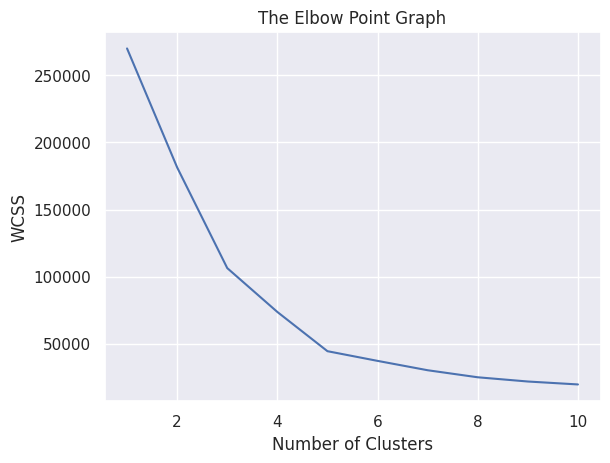

In [16]:
# plotted  an elbow graph or cut off point graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Here we got 2 drop 1st at 3 and 2nd at 5 we will choose 5 at after that there is no significant drop in graph

*Optimum Number of Clusters = 5*

**Training the k-Means Clustering Model**

In [17]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster number
Y = kmeans.fit_predict(Z)

print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5 Clusters we got  - 0, 1, 2, 3, 4

**Visualizing all the Clusters**

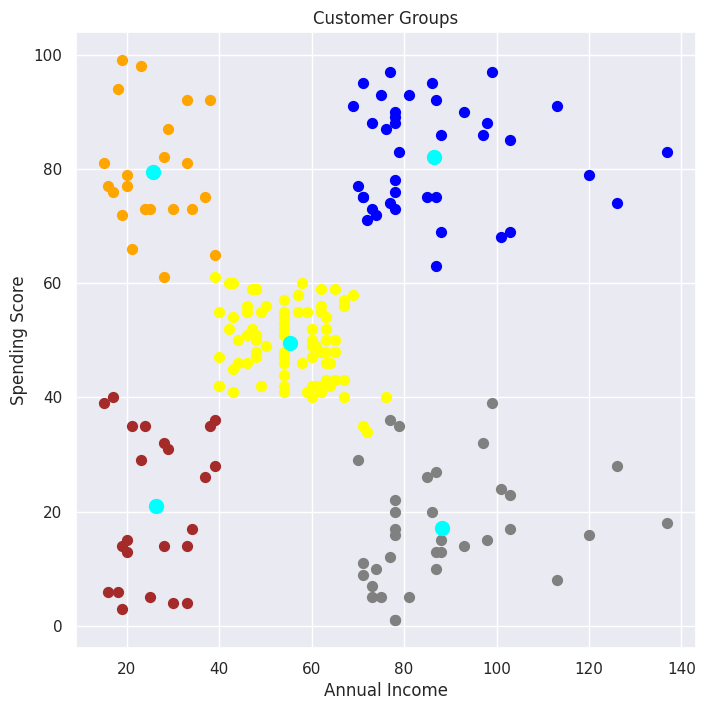

In [20]:
# plotting all the clusters and their Centroids here in color cyan

plt.figure(figsize=(8,8))
plt.scatter(Z[Y==0,0], Z[Y==0,1], s=50, c='grey', label='Cluster 1')
plt.scatter(Z[Y==1,0], Z[Y==1,1], s=50, c='yellow', label='Cluster 2')
plt.scatter(Z[Y==2,0], Z[Y==2,1], s=50, c='blue', label='Cluster 3')
plt.scatter(Z[Y==3,0], Z[Y==3,1], s=50, c='orange', label='Cluster 4')
plt.scatter(Z[Y==4,0], Z[Y==4,1], s=50, c='brown', label='Cluster 5')

#here s =size of dot , c means color  and x axis --Z[Y=0,0]--means 0 -1st clsuter and 0-income column index in Z
# and y axis --Z[Y==0,1] --means 0 -1st clsuter and 1 --spending column index in z


# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')
#[:,0] -- means x axis of centroid and [:,1] means y axis of centroid
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

Conclusion
We have created a customersegmentaion machine learning model based on k- means clsutering method which can suggest the customers spending habits with income  .
Also we have trained our model with data set having 200 rows and 5 columns i.e featured.
We did data cleaning and pre processing

From avoid model we can give offers / membership / discount to customers whose income in more and they are spending less i.e grey color cluster 1.
we can analysis customer behavior and can make our business profitable